In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
all = pd.read_csv('/content/drive/MyDrive/all_features.csv')

In [ ]:
selected = pd.read_csv('/content/drive/MyDrive/selected_features.csv')

In [ ]:
all.columns

Index(['DATE', 'GDP(십억원)', 'GNI(십억원)', 'GDP_GROWTH(%)', 'KOSPI', '국고채(3년)(%)',
       '국고채(10년)(%)', '뉴스심리지수', '경제심리지수', '수출금액지수', '수입금액지수', '수출물가지수(원화기준)',
       '수출물가지수(계약통화기준)', '수출물가지수(달러기준)', '수입물가지수(원화기준)', '수입물가지수(계약통화기준)',
       '수입물가지수(달러기준)', '대외채권', '대외채무', '순대외채권', '외환보유액(천달러)', '기준금리',
       'CD(91일)', '무담보콜금리(1일, 전체거래)', '경상수지(계절조정)', 'CPI', 'PPI',
       '원/미국달러(매매기준율)', '일본엔/달러', '달러/유로', '미국기준금리', 'NASDAQ', '미국CPI',
       '미국PPI', '본원 통화(달러 발행량)', '미국 소비자심리지수', '금', '은', '원유', '한국실업률',
       '미국실업률', '중국위안/달러', '장단기금리차'],
      dtype='object')

In [ ]:
selected.columns

Index(['DATE', 'KOSPI', '기준금리', '수출물가지수(원화기준)', '수입물가지수(원화기준)', 'PPI', '한국실업률',
       '금', '은', '원유', '중국위안/달러', 'NASDAQ', '외환보유액(천달러)', '미국PPI', '뉴스심리지수',
       '대외채무', '본원 통화(달러 발행량)', 'CPI', '장단기금리차', 'GDP_GROWTH(%)',
       '원/미국달러(매매기준율)'],
      dtype='object')

selected 다중회귀

In [ ]:
for col in selected.columns:
    if col != 'DATE' and selected[col].dtype == 'object':
        selected[col] = selected[col].str.replace(',', '')
        selected[col] = pd.to_numeric(selected[col], errors='coerce')

In [ ]:
# 문자열 날짜 → datetime으로 변환
selected['DATE'] = pd.to_datetime(selected['DATE'], errors='coerce')

# 날짜를 숫자로 변환 (1970-01-01부터 며칠이 지났는지)
selected['DATE_NUM'] = (selected['DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# 필요 없는 원래 DATE 문자열 컬럼 제거
selected = selected.drop(columns=['DATE'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 타겟 설정
target_col = '원/미국달러(매매기준율)'

# 특성과 타겟 분리
X = selected.drop(columns=[target_col])
y = selected[target_col]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 다중선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Selected 다중선형회귀모델")
print(f"MSE: {mse:}")
print(f"RMSE: {rmse:}")
print(f"R² Score: {r2:}")

Selected 다중선형회귀모델
MSE: 5888.990155127816
RMSE: 76.73975602728886
R² Score: 0.31971888881180066


all 다중회귀

In [ ]:
for col in all.columns:
    if col != 'DATE' and all[col].dtype == 'object':
        all[col] = all[col].str.replace(',', '')
        all[col] = pd.to_numeric(all[col], errors='coerce')

In [ ]:
# 문자열 날짜 → datetime으로 변환
all['DATE'] = pd.to_datetime(all['DATE'], errors='coerce')

# 날짜를 숫자로 변환 (1970-01-01부터 며칠이 지났는지)
all['DATE_NUM'] = (all['DATE'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# 필요 없는 원래 DATE 문자열 컬럼 제거
all = all.drop(columns=['DATE'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 타겟 설정
target_col = '원/미국달러(매매기준율)'

# 특성과 타겟 분리
X = all.drop(columns=[target_col])
y = all[target_col]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 다중선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("All 다중선형회귀모델")
print(f"MSE: {mse:}")
print(f"RMSE: {rmse:}")
print(f"R² Score: {r2:}")

All 다중선형회귀모델
MSE: 184.97714513207026
RMSE: 13.600630321131085
R² Score: 0.9786319123448876


In [ ]:
# 훈련 데이터 예측
y_train_pred = model.predict(X_train)

# MSE, RMSE, R² 계산
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# 결과 출력
print("훈련 데이터 다중선형회귀모델")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R² Score: {r2_train:.4f}")

훈련 데이터 다중선형회귀모델
MSE: 244.94
RMSE: 15.65
R² Score: 0.9750


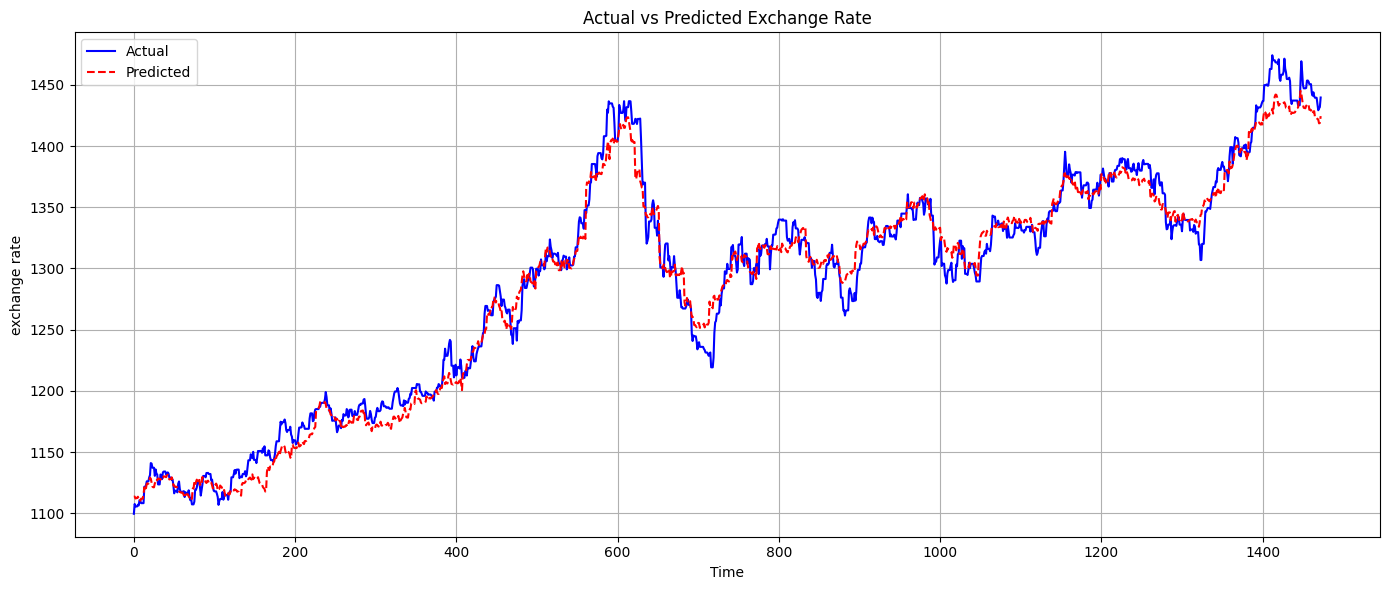

In [ ]:
import matplotlib.pyplot as plt

# 인덱스 초기화 (시각화를 위해)
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred)

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# 실제값
plt.plot(y_test, label='Actual', color='blue')

# 예측값
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')

# 제목 및 레이블
plt.title('Actual vs Predicted Exchange Rate')
plt.xlabel('Time')
plt.ylabel('exchange rate')
plt.legend()

# 그래프 출력
plt.grid(True)
plt.tight_layout()
plt.show()